## 1



在命令行窗口直接输入，或保存为脚本文件运行

In [1]:
a=floor(rand(1,3)*10)
b=floor(rand(1,4)*10)
c=conv(a,b)


a =

     8     9     1


b =

     9     6     0     2


c =

    72   129    63    22    18     2



两个长度分别为$m$和$n$的序列，卷积和得到的序列的长度是$m+n-1$。

编写以下的函数：
```OCTAVE
function [y,n] = conv_m(x,h)
%Modified convolution routine.
% x, h: Input vectors
% y: Convolution result
% n: Length of y
y=conv(x,h);
n=length(x)+length(h)-1; % or n=length(y)
end
```

在当前文件夹下将其保存为`conv_m.m`文件。通过调用该函数即可得到两个序列的卷积和及其长度：

In [2]:
[c,n]=conv_m(a,b)


c =

    72   129    63    22    18     2


n =

     6



## 2

编写以下的脚本

In [3]:
A=[1 -3 3; 2 3 -1; 4 -3 -1];
b=[-4; 15; 19];
x=A\b
x1=inv(A)*b


x =

     5
     1
    -2


x1 =

    5.0000
    1.0000
   -2.0000



可以直接得到线性方程组的解。可以看到两种方法得到的结果是相同的。其中后一种方法的局限性比较大，要求矩阵$\bf{A}$是可逆的（方阵且满秩）。而前一种方法则比较灵活，如果矩阵$\bf{A}$是奇异的，在给出警告的同时仍能给出结果；另外还可用来计算过定或欠定（矩阵$\bf{A}$的行数大于或小于列数）的情况，给出方程组的最小二乘解。详情见[MATLAB关于左除的说明文档](https://www.mathworks.cn/cn/help/matlab/ref/mldivide.html)。

## 3

(a) 在命令行窗口输入`help sinc`将在命令行窗口显示`sinc`函数的帮助文本；输入`doc sinc`将打开MATLAB的Help浏览器，显示`sinc`函数的参考页面；输入`edit sinc`将打开编辑器，显示`sinc`函数的源程序。

(b) 脚本程序如下。可以看出取不同的步长，画出曲线的精细程度不同。

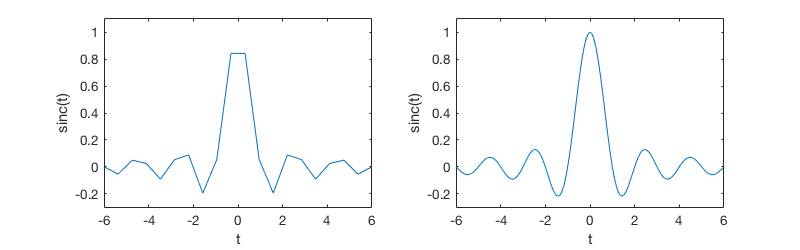

In [4]:
%plot -s 800,250
t=linspace(-6,6,20);
subplot(1,2,1); plot(t,sinc(t));
axis([-6 6 -0.3 1.1]); xlabel('t'); ylabel('sinc(t)');
t=linspace(-6,6,200);
subplot(1,2,2); plot(t,sinc(t));
axis([-6 6 -0.3 1.1]); xlabel('t'); ylabel('sinc(t)');

## 4

(a) 见实验内容。

(b) 参考脚本如下：

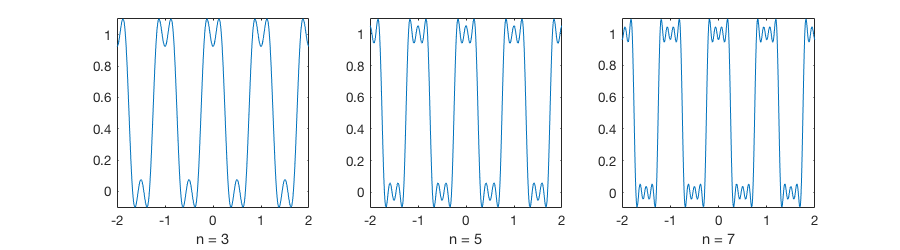

In [5]:
%plot -s 900,250
n=7;
t=linspace(-2,2,500);
x=zeros(2*n+1,length(t));
for k=-n:n
    x(n+1+k,:)=myexp(t,0.,2*pi*k,sinc(k/2)/2);
end
subplot(1,3,1); plot(t,real(sum(x(n+1-3:n+1+3,:))')); xlabel('n = 3');
subplot(1,3,2); plot(t,real(sum(x(n+1-5:n+1+5,:))')); xlabel('n = 5');
subplot(1,3,3); plot(t,real(sum(x)')); xlabel('n = 7');

当$n \to \infty $时，得到的信号是周期方波信号。

## 5

参考脚本如下：

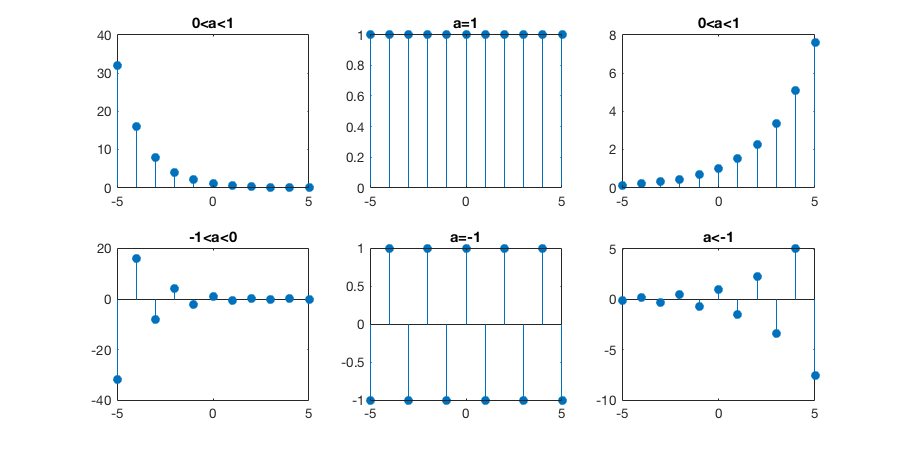

In [6]:
%plot -s 900,450
k=-5:5;
subplot(2,3,1), stem(k,(0.5).^k,'filled'), title('0<a<1');
subplot(2,3,2), stem(k,(1.).^k,'filled'), title('a=1');
subplot(2,3,3), stem(k,(1.5).^k,'filled'), title('0<a<1');
subplot(2,3,4), stem(k,(-0.5).^k,'filled'), title('-1<a<0');
subplot(2,3,5), stem(k,(-1.).^k,'filled'), title('a=-1');
subplot(2,3,6), stem(k,(-1.5).^k,'filled'), title('a<-1');

## 6

参考脚本如下：

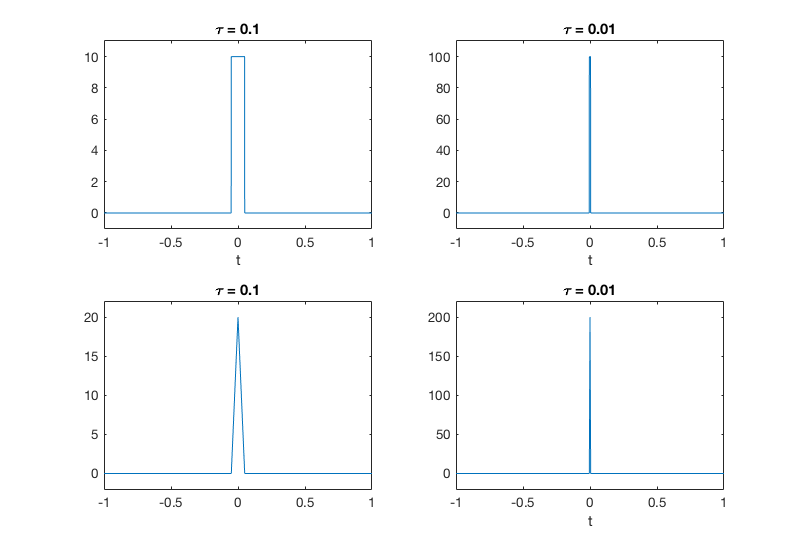

In [7]:
%plot -s 800,550
t=-1:1/1000:1;
tau=0.1;
x=rectpuls(t,tau)/tau;
as=0.1*(max(x)-min(x));
ay=[min(x)-as max(x)+as];
subplot(2,2,1), plot(t,x); 
axis([-1 1 ay]), xlabel('t'), title('\tau = 0.1');
tau=0.01;
x=rectpuls(t,tau)/tau;
as=0.1*(max(x)-min(x));
ay=[min(x)-as max(x)+as];
subplot(2,2,2), plot(t,x);
axis([-1 1 ay]), xlabel('t'), title('\tau = 0.01');
tau=0.1;
x=tripuls(t,tau)/tau*2;
as=0.1*(max(x)-min(x));
ay=[min(x)-as max(x)+as];
subplot(2,2,3), xlabel('t'), plot(t,x);
axis([-1 1 ay]), title('\tau = 0.1');
tau=0.01;
x=tripuls(t,tau)/tau*2;
as=0.1*(max(x)-min(x));
ay=[min(x)-as max(x)+as];
subplot(2,2,4), plot(t,x);
axis([-1 1 ay]), xlabel('t'), title('\tau = 0.01');

注意定义矩形脉冲和三角脉冲的幅度，使其满足$\int_{ - \infty }^\infty  {x\left( t \right)dt}  = 1$。脚本中`ay`的作用是作图时给出合适的纵坐标范围。

其中用到的`rectpuls`和`tripuls`函数来自Signal Processing Toolbox。这两个函数可以自编，例如：

```OCTAVE
function y = rectpuls(t,Tw)
%RECTPULS Sampled aperiodic rectangle generator.
%   RECTPULS(t,Tw) generates a rectangular pulse of width Tw centered at
%     T=0.
y = double(abs(t)<Tw/2-eps);
end
```

```OCTAVE
function y = tripuls(t,Tw)
%TRIPULS Sampled aperiodic triangle generator.
%   TRIPULS(t,Tw) generates a symmetric triangular pulse of width Tw
%     centered at T=0.
y=zeros(size(t));
h=Tw/2;
idx=t>=-h&t<=0; y(idx)=(t(idx)+h)/h;
idx=t<h&t>0; y(idx)=-(t(idx)-h)/h;
end
```



# 思考题

## 1

MATLAB文件的合法命名形式是以字母开头，并且只能包含大小写字母、数字和下划线。原因是很多特殊字符在MATLAB中有特定的意义和作用，如果文件名中包含这些字符，容易发生混淆。同理，如果文件名以数字命名，那么在调用这个文件给出的脚本或函数时，MATLAB会误将这个调用理解成是一个常数。

## 2

间隔步长太小会影响运算和作图的精度，而太大会占用过多的系统资源，影响运算速度。通常在画一条曲线时，  `plot`函数的输入向量包含几百个元素是比较合适的。